## polymer and maximum entropy

1. Modify the simplemd code in order to simulate a polymer with a FENE potential. To this aim add an attractive potential in the form
-0.5 k R0^2 log(1-(distance/R0)^2);

on pairs of consecutive atoms, where k=30 and R0=1.5 (LJ units). Notice that you should compute the derivative in order to add the proper force.

2. Run a simulation at temperature T=0.722 using the following initial coordinates

3. Compute the average gyration radius of the polymer RGYR 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
%%bash
cat > in1 << EOF
inputfile crystalpoly.xyz
outputfile output.xyz
temperature 0.722
tstep 0.005
friction 1
nstep 200000
nconfig 1 trajectorypoly.xyz
nstat 1 energiespoly.dat
EOF
python3 python/simplemd2.py < in1

Neighbour list recomputed at step  0
List size:  10000
Neighbour list recomputed at step  24
List size:  10000
Neighbour list recomputed at step  47
List size:  10000
Neighbour list recomputed at step  77
List size:  10000
Neighbour list recomputed at step  125
List size:  10000
Neighbour list recomputed at step  146
List size:  10000
Neighbour list recomputed at step  171
List size:  10000
Neighbour list recomputed at step  237
List size:  10000
Neighbour list recomputed at step  276
List size:  10000
Neighbour list recomputed at step  328
List size:  10000
Neighbour list recomputed at step  363
List size:  10000
Neighbour list recomputed at step  401
List size:  10000
Neighbour list recomputed at step  429
List size:  10000
Neighbour list recomputed at step  459
List size:  10000
Neighbour list recomputed at step  485
List size:  10000
Neighbour list recomputed at step  508
List size:  10000
Neighbour list recomputed at step  531
List size:  10000
Neighbour list recomputed at step  5

/home/ivang/Documenti/exercise8/GiovanniBussi-simplemd-9f7f5d7/python/simplemd2.py:108: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "_compute_forces" failed type inference due to: Untyped global name 'compute_poly': Cannot determine Numba type of <class 'function'>

File "python/simplemd2.py", line 112:
def _compute_forces(cell, positions, forcecutoff, neighbors, point, forces, lambd, kT):
    <source elided>
    R0=1.5
    Ree,Rg2=compute_poly(positions) ## try to avoid recomputing it
    ^

  @numba.jit(cache=True,fastmath=True)
/home/ivang/Documenti/exercise8/GiovanniBussi-simplemd-9f7f5d7/python/simplemd2.py:108: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "_compute_forces" failed type inference due to: Untyped global name 'compute_poly': Cannot determine Numba type of <class 'function'>

File "python/simplemd2.py", line 112:
def _compute_forces(cell, positions, forcec

In [143]:
# load statistics
ene=np.loadtxt("energiespoly.dat")#F" + str(f) + ".dat")

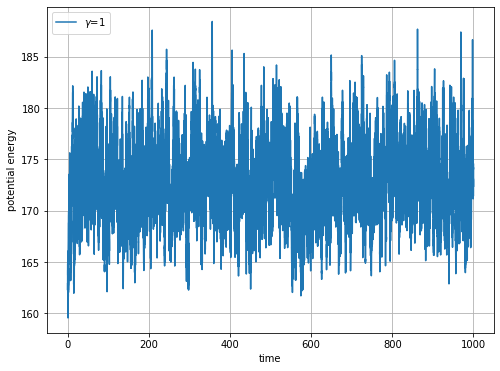

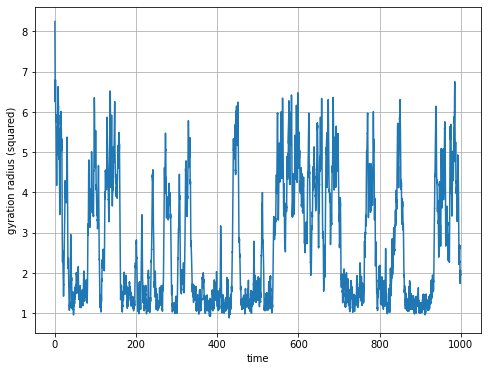

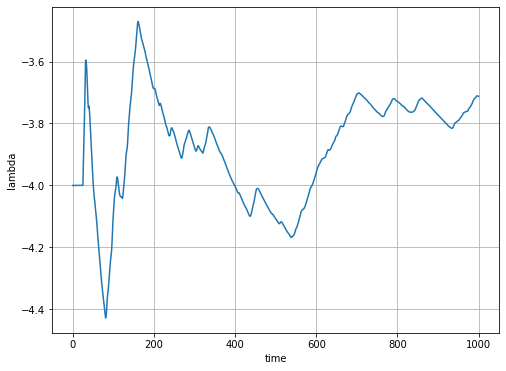

2.716207866984999


In [144]:
### 3 kinetic energy, 4 config. energy, 5 total energy
### 6 end-to-end distance, 7 squared gyration radius, 8 lambda


plt.figure(figsize=(8,6))
plt.plot(ene[:,1],ene[:,4],label='$\gamma$=%s'%f)
plt.legend()
plt.grid(axis='both')
plt.xlabel('time')
plt.ylabel('potential energy')
#plt.xlim([0,20])
#plt.ylim([0,50])
plt.show()


plt.figure(figsize=(8,6))
plt.plot(ene[:,1],ene[:,7])#,label='$\gamma$=%s'%f)
#plt.legend()
plt.grid(axis='both')
plt.xlabel('time')
plt.ylabel('gyration radius (squared)')
#plt.xlim([0,40])
#plt.ylim([0,10])
plt.show()


plt.figure(figsize=(8,6))
plt.plot(ene[:,1],ene[:,8])#,label='$\gamma$=%s'%f)
#plt.legend()
plt.grid(axis='both')
plt.xlabel('time')
plt.ylabel('lambda')
#plt.xlim([0,40])
#plt.ylim([0,10])
plt.show()

avRg2=np.mean(ene[:,7])
print(avRg2)

4. Modify the code in order to add a term to the potential linear in RGYR. Be careful when computing the derivatives of RGYR with respect to atomic positions
5. Find the Lagrangian multiplier required to enforce an average RGYR=2.5. You can either proceed by trial and error or adjust the Lagrangian multiplier during the simulation.

In [88]:
print(ene[f][:,8])

[-4.5      -4.5      -4.5      ... -3.747179 -3.747172 -3.747164]
